# Counterfactual explanations

wildboar can explain predictions of nearest neighbors classifiers and shapelet forest classifiers
using counterfactual samples. In this scenario, counterfactuals are samples that
are transformed such that the labeling of the sample changes. For instance,
we might want to explain what changes are required to transforms a sample
labeled as `abnormal` to `normal`. In this scenario, the normal sample would
be the counterfactual sample.

In wildboar, counterfactual explainers are in the module ``wildboar.explain.counterfactual``.
The easiest way to generate counterfactuals is to use the function ``counterfactuals``:

In [1]:
from wildboar.explain.counterfactual import counterfactuals

Currently, the classifiers that supports counterfactual explanations are ``ShapeletForestClassifier`` and ``KNearestNeighborsClassifier`` from ``wildboar`` and ``scikit-learn`` respectively. Model agnostic counterfactual explanations can be provided for any other estimators.

To have more control over the generation of counterfactual samples, the classes ``KNeighborsCounterfactual`` and ``ShapeletForestCounterfactuals`` can be used. They implement the interface of ``BaseCounterfactuals`` which exposes two methods ``fit(estimator)`` and ``transform(x, y)``, where the former fits a counterfactual explainer to an estimator and the latter transform the i:th sample of `x` to a sample labeled as the i:th label in `y`.

In [10]:
import matplotlib.pylab as plt
from wildboar.datasets import load_dataset
from wildboar.explain.counterfactual import KNeighborsCounterfactual
from sklearn.neighbors import KNeighborsClassifier

That is, given 

In [ ]:
x_train, x_test, y_train, y_test = load_dataset("GunPoint", merge_train_test=False)
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
clf.fit(x_train, y_train)

In [14]:
c = KNeighborsCounterfactual(random_state=123)
c.fit(clf)
counterfactual = c.transform(x_test, 1)

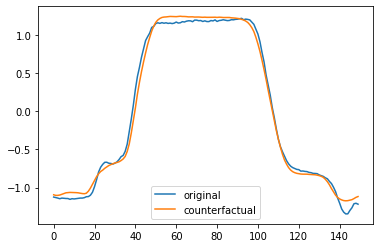

In [15]:
plt.plot(x_test[0])
plt.plot(counterfactual[0])
plt.legend(["original", "counterfactual"])

<div class="alert alert-info">

Warning

``KNeighborsCounterfactuals`` only supports ``KNeighborsClassifier`` fit with the Euclidean distance.
</div>

## Example

In the following example, we explain the a nearest neighbors classifier and
a shapelet forest classifier for the datasets `TwoLeadECG` and explaining samples
classified as `2.0` if they instead where classified as `1.0` (in the legend
denoted as `abnormal` and `normal` respectively).

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from wildboar.ensemble import ShapeletForestClassifier
from wildboar.explain.counterfactual import counterfactuals

In [17]:
x, y = load_dataset("TwoLeadECG")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

estimator = ShapeletForestClassifier(random_state=123, n_jobs=-1, metric="euclidean")
estimator.fit(x_train, y_train)
x_test = x_test[y_test == 2.0]
x_counterfactuals, valid, score = counterfactuals(
    estimator, 
    x_test, 
    1.0, 
    scoring="euclidean", 
    random_state=123,
)

x_test = x_test[valid]
x_counterfactuals = x_counterfactuals[valid]
i = np.argsort(score[valid])[:2]
x_counterfactuals = x_counterfactuals[i, :]
x_test = x_test[i, :]

Plotting the counterfactual with the lowest score, yeilds the following figure.

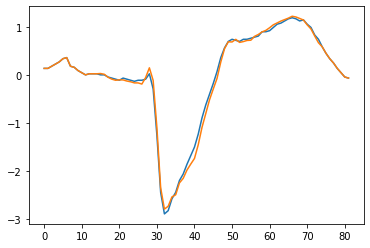

In [18]:
plt.plot(x_test[0])
plt.plot(x_counterfactuals[0])